# Разведочный анализ данных

## Импорты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

Данные в формате tskv (Tab separated key-value)

In [ ]:
# !mkdir data
# !wget https://github.com/yandex/geo-reviews-dataset-2023/raw/refs/heads/master/geo-reviews-dataset-2023.tskv -O ../data/data.tskv

--2024-12-03 16:16:17--  https://github.com/yandex/geo-reviews-dataset-2023/raw/refs/heads/master/geo-reviews-dataset-2023.tskv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/yandex/geo-reviews-dataset-2023/refs/heads/master/geo-reviews-dataset-2023.tskv [following]
--2024-12-03 16:16:18--  https://media.githubusercontent.com/media/yandex/geo-reviews-dataset-2023/refs/heads/master/geo-reviews-dataset-2023.tskv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 378730064 (361M) [application/octet-stream]
Saving to: 'data/data.tskv'

     0K .......... .......... .......... .........

## Создание Pandas DataFrame

In [ ]:
# Чтение файла по строкам
with open("../data/data.tskv", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Парсим каждую строку
parsed_data = []
for line in lines:
    # Разбиваем строку на Dict[key, value]
    line_dict = dict(item.split("=", 1) for item in line.split("\t"))
    parsed_data.append(line_dict)

# Преобразуем в DataFrame
df = pd.DataFrame(parsed_data)
# Приведём оценки из object в числовой формат
df["rating"] = df["rating"].apply(lambda x: np.int8(float(x)))
df

,address,name_ru,rating,rubrics,text
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...
...,...,...,...,...,...
499995,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4,Железнодорожная станция,"Охрана кривая но добрая, двери не закрываются ..."
499996,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4,Железнодорожная станция,По сравнению со многими современными платформа...
499997,"Новосибирск, Коммунистическая улица, 48А",NaN,5,"Бар, паб","Приятная атмосфера, прекрасное вино, волшебная..."
499998,"Астраханская область, Харабалинский район",Сарай-Бату,5,Достопримечательность,Был с семьёй 13.06.23 Отличное место. Рекоменд...


## Конвертация в формат CSV

In [ ]:
# df.to_csv("../data/data.csv", index=False)
# df = pd.read_csv("../data/data.csv")

## Работа с пропусками

In [117]:
df.isna().sum()

address      0
name_ru    970
rating       0
rubrics      0
text         0
dtype: int64

Выводы:

* Пропуски содержатся в названии места. Остальные параметры без пропусков.
* Такие пропуски лучше оставить. Модель дожна знать что делать, если название места не было передано в запросе.
* Заполним пустой стройкой.

In [118]:
df["name_ru"] = df["name_ru"].fillna("")
df.isna().sum()

address    0
name_ru    0
rating     0
rubrics    0
text       0
dtype: int64

In [120]:
df[df["rating"] == 0]

,address,name_ru,rating,rubrics,text
1907,"Республика Карелия, Суоярви, улица Шельшакова, 1",Гостиница Карелия,0,Гостиница,"Гостиница расположенна удобно, если отремонтир..."
2165,"Кемерово, улица Тухачевского, 12",Светофор,0,Магазин автозапчастей и автотоваров;Автоаксесс...,Это мой любимый магазин с запчастями. Можно вс...
3584,"Краснодарский край, Анапа, улица Пушкина, 30",Кубань,0,Санаторий,"Нет растительного масла для салата, нет зубочи..."
3615,"Краснодарский край, Туапсинский район, Новомих...",Счастливый Хотей,0,Гостиница,"Все довольны, и взрослые и дети.\nВкусная еда...."
6389,"Ленинградская область, Выборг, улица Мира, 8А",Атриум,0,Торговый центр,"Большой выбор, очень грамотно и удобно разложе..."
...,...,...,...,...,...
482054,"посёлок городского типа Сириус, Набережная ули...",Ем и ем,0,Столовая;Быстрое питание;Доставка еды и обедов,Отличная столовая ходим переодически по сравне...
483488,"Кабардино-Балкарская Республика, Нальчик, улиц...",Амбассадор,0,Ресторан;Доставка еды и обедов,На днях посетили с семьёй ресторан Амбассадор....
486941,"Свердловская область, Екатеринбург, улица Цвил...",Рими,0,Мебель для кухни;Мебель на заказ;Гардеробные с...,Кухни европейского качества. Хорошее обслужива...
495253,"Санкт-Петербург, Полтавская улица, 3",Добрый Грузин,0,Ресторан;Доставка еды и обедов;Банкетный зал,"Очень вкусно готовят. Мясо шикарное, шашлык, х..."


Выводы:

* Видим, что есть нулевые рейтинги и, при этом, положительное текстовое описание. Это тоже пропуски в данных. Всего 200 строк.
* Таких пропусков немного, а заполнение будет достаточно трудоёмким, поэтому их лучше просто удалить из датасета.

In [121]:
df = df[~(df["rating"] == 0)]
df.shape

(499800, 5)

Выводы:

* Данные очищены от пропусков.

## Баланс классов

Не смотря на то, что у наc задача генерации текста, текстовые описания носят в том числе и эмоциональный окрас, выражающийся оценкой `rating`. Можно сказать, что тексты классифицируются по тональности.

In [122]:
df["rating"].value_counts().apply(lambda x: round(x / df.shape[0], 2))

rating
5    0.78
4    0.08
1    0.07
3    0.04
2    0.02
Name: count, dtype: float64

Выводы:

* Есть значительный дисбаланс. Положительные отзывы занимают 86% от всех отзывов.

## Анализ длин текстов

Дополним DataFrame длинами текстов.

In [135]:
df["length"] = df["text"].apply(lambda x: len(x))
df.head()

,address,name_ru,rating,rubrics,text,length
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...,538
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ...",159
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я...",486
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...,143
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...,374


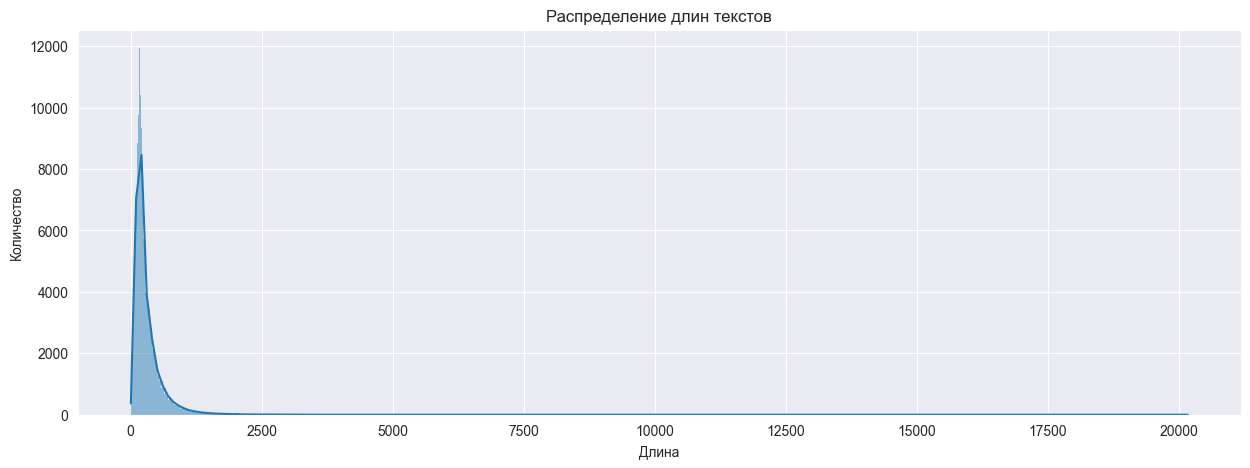

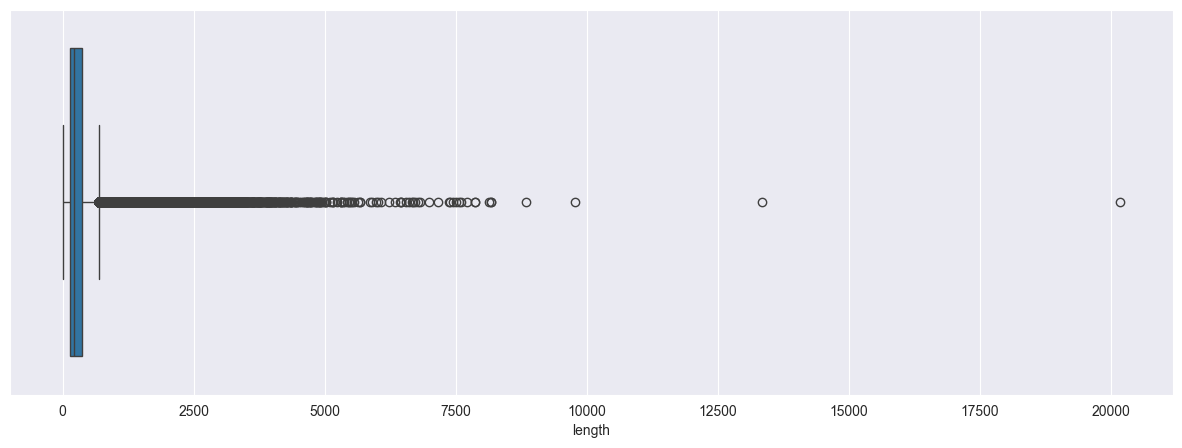

In [136]:
sns.set_style("darkgrid")


def length_distribution(lengths, name):
    plt.figure(figsize=(15, 5))
    sns.histplot(x=lengths, kde=True)
    plt.xlabel("Длина")
    plt.ylabel("Количество")
    plt.title(name)
    plt.show()

    plt.figure(figsize=(15, 5))
    sns.boxplot(x=lengths)
    plt.show()


length_distribution(df["length"], "Распределение длин текстов")

In [166]:
print(df[df["length"] > 10000]["text"].values)

['Que si, que no...\\nМногажды бывал в этом замечательном отеле, и с каждым разом всё больше и больше эта песня про тупящего влюблённого, являющаяся гимном отеля, всё точнее и точнее описывает качество отдыха. Вообще, этот гимн противоречиям максимально отражает происходящее с Вами на отдыхе в Ялта Интурист.\\nНачинается знакомство с особенностями сервиса со службы размещения (это те, кого называют ресепшн). Приветливость сотрудников на стойке регистрации можно выделить отдельно, Вас всегда встретят с улыбкой, всё расскажут и ответят на Ваши вопросы при заселении, но на чемпионате мира по созданию очередей, они без особого труда возьмут второе место (первое – без шансов конкурентам у транспортной безопасности терминала Аэроэкспресс в Шереметьево). Специальный удобный трансфер быстро перемещает десятки гостей из аэропорта и вокзала в очередь на заселение, где на 6 стойках регистрации работают всего один или два сотрудника. Господа, это, же, элементарно: на время прибытия трансферов долж

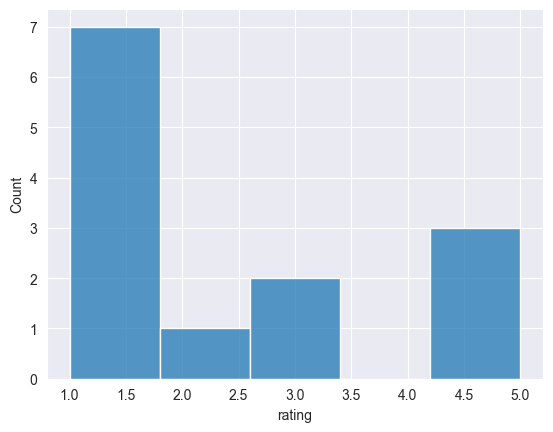

In [165]:
sns.histplot(x=df[df["length"] > 7500]["rating"])
plt.show()

Выводы:

* Выбросов нет. Есть длинные обстоятельные обзоры.
* Среди длинных обзоров немного больше отрицательных.